In [25]:
# Plots for basecalling accuracy with lossy compression

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd

In [27]:
compressed_size_dir = '../../data/Staphylococcus_aureus_CAS38_02/compressed_size_summary/'
NUM_EXP = 10 # we tried maxerror parameter from 1 to 10

In [28]:
# load compressed sizes and signal lengths into numpy arrays
# array size = number of reads

with open(compressed_size_dir+'/VBZ_lossless.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    rows = [row for row in reader]
    
signal_lengths = np.array([int(row[1]) for row in rows[1:]],dtype=int)
lossless_sizes = np.array([int(row[2]) for row in rows[1:]],dtype=int)

LFZip_sizes = np.zeros((NUM_EXP,len(lossless_sizes)),dtype=int)
SZ_sizes = np.zeros((NUM_EXP,len(lossless_sizes)),dtype=int)

for i in range(NUM_EXP):
    with open(compressed_size_dir+'/LFZip_maxerror_'+str(i+1)+'.tsv') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        rows = [row for row in reader]
    LFZip_sizes[i,:] = np.array([int(row[2]) for row in rows[1:]],dtype=int)
    
for i in range(NUM_EXP):
    with open(compressed_size_dir+'/SZ_maxerror_'+str(i+1)+'.tsv') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        rows = [row for row in reader]
    SZ_sizes[i,:] = np.array([int(row[2]) for row in rows[1:]],dtype=int)
    

In [29]:
# compute some totals 
signal_lengths_sum = np.sum(signal_lengths)
lossless_sizes_sum = np.sum(lossless_sizes)
LFZip_sizes_sum = np.sum(LFZip_sizes,axis=1)
SZ_sizes_sum = np.sum(SZ_sizes,axis=1)

In [30]:
# Average compression ratio (bytes/signal value) for lossless compression
print('Lossless compression ratio:','{:.3f}'.format((lossless_sizes_sum/signal_lengths_sum)))

Lossless compression ratio: 0.832


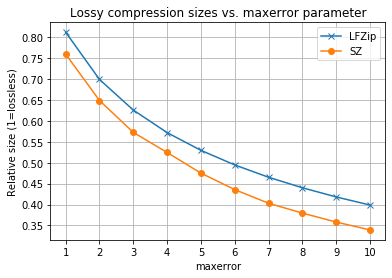

In [31]:
plt.plot(range(1,NUM_EXP+1),LFZip_sizes_sum/lossless_sizes_sum,marker='x')
plt.plot(range(1,NUM_EXP+1),SZ_sizes_sum/lossless_sizes_sum,marker='o')
plt.xticks(range(1,NUM_EXP+1))
plt.yticks([0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8])
plt.xlabel('maxerror')
plt.ylabel('Relative size (1=lossless)')
plt.legend(['LFZip','SZ'])
plt.title('Lossy compression sizes vs. maxerror parameter')
plt.grid()
plt.savefig('lossy_compression_sizes.pdf')

In [32]:
# Now load the basecalling accuracy data
# array size = number of reads
basecalled_accuracy_dir = '../../data/Staphylococcus_aureus_CAS38_02/guppy_hac/basecall_accuracy/'

with open(basecalled_accuracy_dir+'/lossless.fastq.basecall_analysis.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    rows = [row for row in reader]
    
lossless_lengths = np.array([int(row[1]) for row in rows[1:]],dtype=int)
lossless_accuracy = np.array([float(row[2]) for row in rows[1:]])

LFZip_lengths = np.zeros((NUM_EXP,len(lossless_lengths)),dtype=int)
LFZip_accuracy = np.zeros((NUM_EXP,len(lossless_lengths)))
SZ_lengths = np.zeros((NUM_EXP,len(lossless_lengths)),dtype=int)
SZ_accuracy = np.zeros((NUM_EXP,len(lossless_lengths)))

for i in range(NUM_EXP):
    with open(basecalled_accuracy_dir+'/LFZip_maxerror_'+str(i+1)+'.fastq.basecall_analysis.tsv') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        rows = [row for row in reader]
    LFZip_lengths[i,:] = np.array([int(row[1]) for row in rows[1:]],dtype=int)
    LFZip_accuracy[i,:] = np.array([float(row[2]) for row in rows[1:]])
    
for i in range(NUM_EXP):
    with open(basecalled_accuracy_dir+'/SZ_maxerror_'+str(i+1)+'.fastq.basecall_analysis.tsv') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        rows = [row for row in reader]
    SZ_lengths[i,:] = np.array([int(row[1]) for row in rows[1:]],dtype=int)
    SZ_accuracy[i,:] = np.array([float(row[2]) for row in rows[1:]])

In [33]:
# compute some totals 
lossless_lengths_sum = np.sum(lossless_lengths)
LFZip_lengths_sum = np.sum(LFZip_lengths,axis=1)
SZ_lengths_sum = np.sum(SZ_lengths,axis=1)

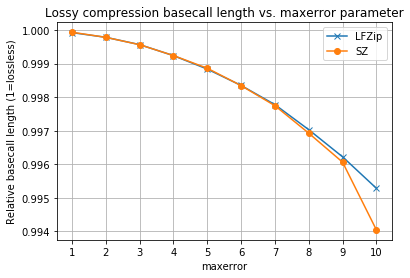

In [34]:
# check if total basecalling length is preserved
plt.plot(range(1,NUM_EXP+1),LFZip_lengths_sum/lossless_lengths_sum,marker='x')
plt.plot(range(1,NUM_EXP+1),SZ_lengths_sum/lossless_lengths_sum,marker='o')
plt.xticks(range(1,NUM_EXP+1))
plt.xlabel('maxerror')
plt.ylabel('Relative basecall length (1=lossless)')
plt.legend(['LFZip','SZ'])
plt.title('Lossy compression basecall length vs. maxerror parameter')
plt.grid()
plt.savefig('guppy_hac/lossy_compression_basecall_length.pdf')

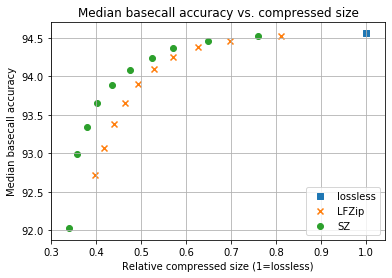

In [35]:
# Now plot distortion rate style curves
# first for median accuracy (used in Wick's analysis)
plt.scatter(1.0,np.median(lossless_accuracy),marker='s')
plt.scatter(LFZip_sizes_sum/lossless_sizes_sum,np.median(LFZip_accuracy,axis=1),marker='x')
plt.scatter(SZ_sizes_sum/lossless_sizes_sum,np.median(SZ_accuracy,axis=1),marker='o')
plt.legend(['lossless','LFZip','SZ'])
plt.xlabel('Relative compressed size (1=lossless)')
plt.ylabel('Median basecall accuracy')
plt.title('Median basecall accuracy vs. compressed size')
plt.grid()
plt.savefig('guppy_hac/median_accuracy_rd.pdf')

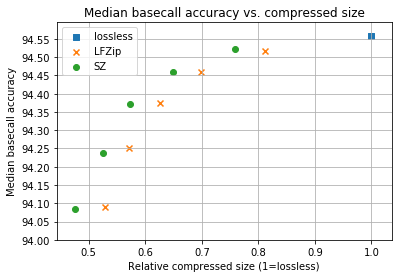

In [36]:
# median accuracy (zoomed in)
plt.scatter(1.0,np.median(lossless_accuracy),marker='s')
plt.scatter(LFZip_sizes_sum[:5]/lossless_sizes_sum,np.median(LFZip_accuracy[:5,:],axis=1),marker='x')
plt.scatter(SZ_sizes_sum[:5]/lossless_sizes_sum,np.median(SZ_accuracy[:5,:],axis=1),marker='o')
plt.legend(['lossless','LFZip','SZ'])
plt.xlabel('Relative compressed size (1=lossless)')
plt.ylabel('Median basecall accuracy')
plt.title('Median basecall accuracy vs. compressed size')
plt.yticks(np.arange(94.,94.6,0.05))
plt.grid()
plt.savefig('guppy_hac/median_accuracy_rd_zoom.pdf')

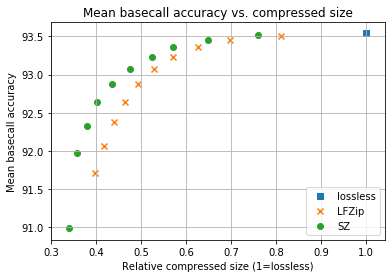

In [37]:
# mean accuracy
plt.scatter(1.0,np.mean(lossless_accuracy),marker='s')
plt.scatter(LFZip_sizes_sum/lossless_sizes_sum,np.mean(LFZip_accuracy,axis=1),marker='x')
plt.scatter(SZ_sizes_sum/lossless_sizes_sum,np.mean(SZ_accuracy,axis=1),marker='o')
plt.legend(['lossless','LFZip','SZ'])
plt.xlabel('Relative compressed size (1=lossless)')
plt.ylabel('Mean basecall accuracy')
plt.title('Mean basecall accuracy vs. compressed size')
plt.grid()
plt.savefig('guppy_hac/mean_accuracy_rd.pdf')

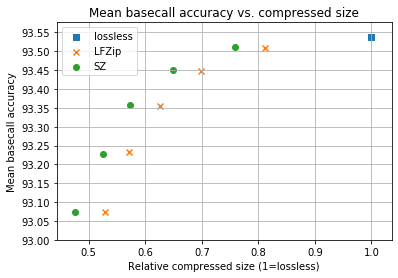

In [38]:
# mean accuracy (zoomed in)
plt.scatter(1.0,np.mean(lossless_accuracy),marker='s')
plt.scatter(LFZip_sizes_sum[:5]/lossless_sizes_sum,np.mean(LFZip_accuracy[:5,:],axis=1),marker='x')
plt.scatter(SZ_sizes_sum[:5]/lossless_sizes_sum,np.mean(SZ_accuracy[:5,:],axis=1),marker='o')
plt.legend(['lossless','LFZip','SZ'])
plt.xlabel('Relative compressed size (1=lossless)')
plt.ylabel('Mean basecall accuracy')
plt.title('Mean basecall accuracy vs. compressed size')
plt.yticks(np.arange(93.00,93.6,0.05))
plt.grid()
plt.savefig('guppy_hac/mean_accuracy_rd_zoom.pdf')

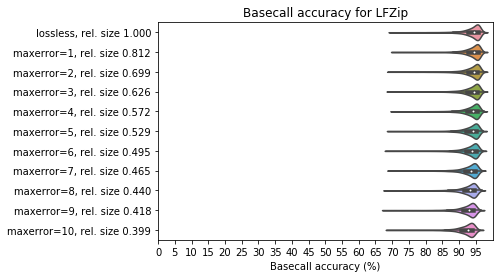

In [39]:
# finally some violin plots for accuracy!
data_dict = {'lossless, rel. size 1.000': lossless_accuracy}
for i in range(NUM_EXP):
    data_dict['maxerror='+str(i+1)+', rel. size '+'{:.3f}'.format(LFZip_sizes_sum[i]/lossless_sizes_sum)] \
                    = LFZip_accuracy[i,:]
df = pd.DataFrame(data_dict)
sns.violinplot(data=df,orient='h')
plt.xticks(np.arange(0,100,5))
plt.title('Basecall accuracy for LFZip')
plt.xlabel('Basecall accuracy (%)')
plt.savefig('guppy_hac/violin_LFZip.pdf',bbox_inches='tight')

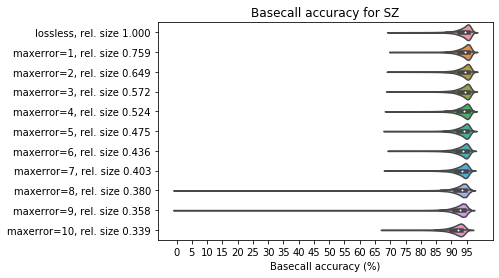

In [40]:
# for SZ
data_dict = {'lossless, rel. size 1.000': lossless_accuracy}
for i in range(NUM_EXP):
    data_dict['maxerror='+str(i+1)+', rel. size '+'{:.3f}'.format(SZ_sizes_sum[i]/lossless_sizes_sum)] \
                    = SZ_accuracy[i,:]
df = pd.DataFrame(data_dict)
sns.violinplot(data=df,orient='h')
plt.xticks(np.arange(0,100,5))
plt.title('Basecall accuracy for SZ')
plt.xlabel('Basecall accuracy (%)')
plt.savefig('guppy_hac/violin_SZ.pdf',bbox_inches='tight')

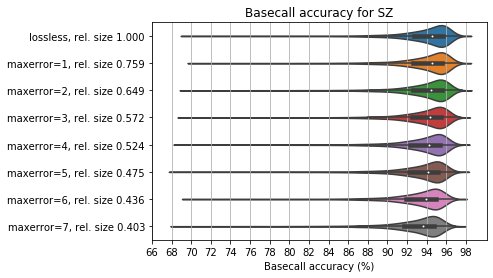

In [41]:
# for SZ (zoomed)
data_dict = {'lossless, rel. size 1.000': lossless_accuracy}
for i in range(7):
    data_dict['maxerror='+str(i+1)+', rel. size '+'{:.3f}'.format(SZ_sizes_sum[i]/lossless_sizes_sum)] \
                    = SZ_accuracy[i,:]
df = pd.DataFrame(data_dict)
sns.violinplot(data=df,orient='h')
plt.xticks(np.arange(66,100,2))
plt.title('Basecall accuracy for SZ')
plt.xlabel('Basecall accuracy (%)')
plt.grid(axis='x')
plt.savefig('guppy_hac/violin_SZ_zoom.pdf',bbox_inches='tight')

In [42]:
# Now load the basecalling accuracy data for guppy fast
# array size = number of reads
basecalled_accuracy_dir = '../../data/Staphylococcus_aureus_CAS38_02/guppy_fast/basecall_accuracy/'

with open(basecalled_accuracy_dir+'/lossless.fastq.basecall_analysis.tsv') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    rows = [row for row in reader]
    
lossless_lengths = np.array([int(row[1]) for row in rows[1:]],dtype=int)
lossless_accuracy = np.array([float(row[2]) for row in rows[1:]])

LFZip_lengths = np.zeros((NUM_EXP,len(lossless_lengths)),dtype=int)
LFZip_accuracy = np.zeros((NUM_EXP,len(lossless_lengths)))
SZ_lengths = np.zeros((NUM_EXP,len(lossless_lengths)),dtype=int)
SZ_accuracy = np.zeros((NUM_EXP,len(lossless_lengths)))

for i in range(NUM_EXP):
    with open(basecalled_accuracy_dir+'/LFZip_maxerror_'+str(i+1)+'.fastq.basecall_analysis.tsv') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        rows = [row for row in reader]
    LFZip_lengths[i,:] = np.array([int(row[1]) for row in rows[1:]],dtype=int)
    LFZip_accuracy[i,:] = np.array([float(row[2]) for row in rows[1:]])
    
for i in range(NUM_EXP):
    with open(basecalled_accuracy_dir+'/SZ_maxerror_'+str(i+1)+'.fastq.basecall_analysis.tsv') as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        rows = [row for row in reader]
    SZ_lengths[i,:] = np.array([int(row[1]) for row in rows[1:]],dtype=int)
    SZ_accuracy[i,:] = np.array([float(row[2]) for row in rows[1:]])

In [43]:
# compute some totals 
lossless_lengths_sum = np.sum(lossless_lengths)
LFZip_lengths_sum = np.sum(LFZip_lengths,axis=1)
SZ_lengths_sum = np.sum(SZ_lengths,axis=1)

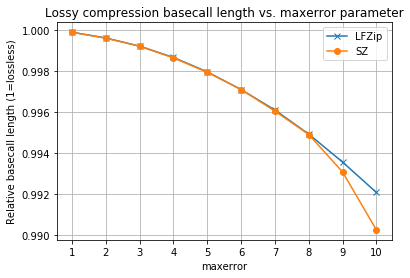

In [44]:
# check if total basecalling length is preserved
plt.plot(range(1,NUM_EXP+1),LFZip_lengths_sum/lossless_lengths_sum,marker='x')
plt.plot(range(1,NUM_EXP+1),SZ_lengths_sum/lossless_lengths_sum,marker='o')
plt.xticks(range(1,NUM_EXP+1))
plt.xlabel('maxerror')
plt.ylabel('Relative basecall length (1=lossless)')
plt.legend(['LFZip','SZ'])
plt.title('Lossy compression basecall length vs. maxerror parameter')
plt.grid()
plt.savefig('guppy_fast/lossy_compression_basecall_length.pdf')

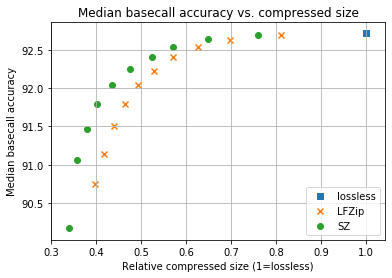

In [45]:
# Now plot distortion rate style curves
# first for median accuracy (used in Wick's analysis)
plt.scatter(1.0,np.median(lossless_accuracy),marker='s')
plt.scatter(LFZip_sizes_sum/lossless_sizes_sum,np.median(LFZip_accuracy,axis=1),marker='x')
plt.scatter(SZ_sizes_sum/lossless_sizes_sum,np.median(SZ_accuracy,axis=1),marker='o')
plt.legend(['lossless','LFZip','SZ'])
plt.xlabel('Relative compressed size (1=lossless)')
plt.ylabel('Median basecall accuracy')
plt.title('Median basecall accuracy vs. compressed size')
plt.grid()
plt.savefig('guppy_fast/median_accuracy_rd.pdf')# Now plot distortion rate style curves

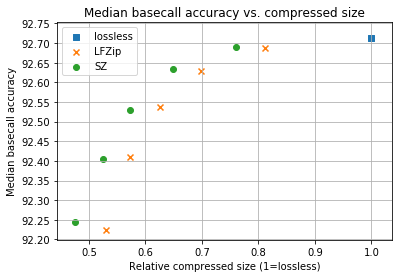

In [46]:
# median accuracy (zoomed in)
plt.scatter(1.0,np.median(lossless_accuracy),marker='s')
plt.scatter(LFZip_sizes_sum[:5]/lossless_sizes_sum,np.median(LFZip_accuracy[:5,:],axis=1),marker='x')
plt.scatter(SZ_sizes_sum[:5]/lossless_sizes_sum,np.median(SZ_accuracy[:5,:],axis=1),marker='o')
plt.legend(['lossless','LFZip','SZ'])
plt.xlabel('Relative compressed size (1=lossless)')
plt.ylabel('Median basecall accuracy')
plt.title('Median basecall accuracy vs. compressed size')
plt.yticks(np.arange(92.2,92.8,0.05))
plt.grid()
plt.savefig('guppy_fast/median_accuracy_rd_zoom.pdf')

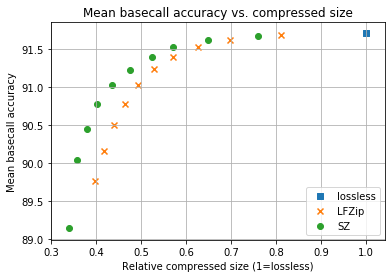

In [47]:
# mean accuracy
plt.scatter(1.0,np.mean(lossless_accuracy),marker='s')
plt.scatter(LFZip_sizes_sum/lossless_sizes_sum,np.mean(LFZip_accuracy,axis=1),marker='x')
plt.scatter(SZ_sizes_sum/lossless_sizes_sum,np.mean(SZ_accuracy,axis=1),marker='o')
plt.legend(['lossless','LFZip','SZ'])
plt.xlabel('Relative compressed size (1=lossless)')
plt.ylabel('Mean basecall accuracy')
plt.title('Mean basecall accuracy vs. compressed size')
plt.grid()
plt.savefig('guppy_fast/mean_accuracy_rd.pdf')

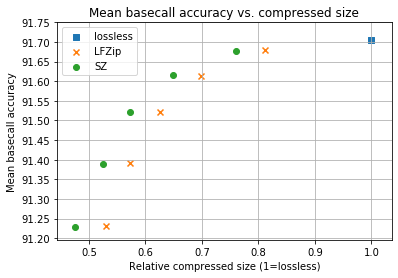

In [48]:
# mean accuracy (zoomed in)
plt.scatter(1.0,np.mean(lossless_accuracy),marker='s')
plt.scatter(LFZip_sizes_sum[:5]/lossless_sizes_sum,np.mean(LFZip_accuracy[:5,:],axis=1),marker='x')
plt.scatter(SZ_sizes_sum[:5]/lossless_sizes_sum,np.mean(SZ_accuracy[:5,:],axis=1),marker='o')
plt.legend(['lossless','LFZip','SZ'])
plt.xlabel('Relative compressed size (1=lossless)')
plt.ylabel('Mean basecall accuracy')
plt.title('Mean basecall accuracy vs. compressed size')
plt.yticks(np.arange(91.20,91.8,0.05))
plt.grid()
plt.savefig('guppy_fast/mean_accuracy_rd_zoom.pdf')

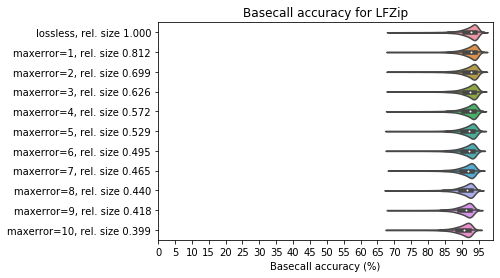

In [49]:
# finally some violin plots for accuracy!
data_dict = {'lossless, rel. size 1.000': lossless_accuracy}
for i in range(NUM_EXP):
    data_dict['maxerror='+str(i+1)+', rel. size '+'{:.3f}'.format(LFZip_sizes_sum[i]/lossless_sizes_sum)] \
                    = LFZip_accuracy[i,:]
df = pd.DataFrame(data_dict)
sns.violinplot(data=df,orient='h')
plt.xticks(np.arange(0,100,5))
plt.title('Basecall accuracy for LFZip')
plt.xlabel('Basecall accuracy (%)')
plt.savefig('guppy_fast/violin_LFZip.pdf',bbox_inches='tight')

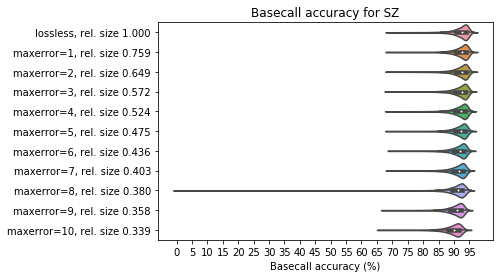

In [50]:
# for SZ
data_dict = {'lossless, rel. size 1.000': lossless_accuracy}
for i in range(NUM_EXP):
    data_dict['maxerror='+str(i+1)+', rel. size '+'{:.3f}'.format(SZ_sizes_sum[i]/lossless_sizes_sum)] \
                    = SZ_accuracy[i,:]
df = pd.DataFrame(data_dict)
sns.violinplot(data=df,orient='h')
plt.xticks(np.arange(0,100,5))
plt.title('Basecall accuracy for SZ')
plt.xlabel('Basecall accuracy (%)')
plt.savefig('guppy_fast/violin_SZ.pdf',bbox_inches='tight')

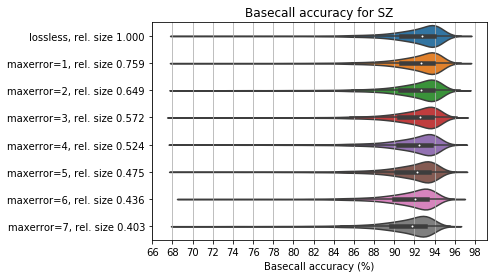

In [51]:
# for SZ (zoomed)
data_dict = {'lossless, rel. size 1.000': lossless_accuracy}
for i in range(7):
    data_dict['maxerror='+str(i+1)+', rel. size '+'{:.3f}'.format(SZ_sizes_sum[i]/lossless_sizes_sum)] \
                    = SZ_accuracy[i,:]
df = pd.DataFrame(data_dict)
sns.violinplot(data=df,orient='h')
plt.xticks(np.arange(66,100,2))
plt.title('Basecall accuracy for SZ')
plt.xlabel('Basecall accuracy (%)')
plt.grid(axis='x')
plt.savefig('guppy_fast/violin_SZ_zoom.pdf',bbox_inches='tight')